In [13]:
import pickle
from astropy.io import fits
import matplotlib.pyplot as plt
import imageHelper as imghelp
import analysisHelper as helper
import numpy as np

In [8]:
path = '/Users/clairealice/Dropbox/zorrodata/example_0524_H620420/'

datalist = []
for f in ['1077', '1078', '1079', '1080', '1081']:
    f1 = 'S20190523Z' + f + 'b.fits.bz2'
    hdu = fits.open(path + f1)
    data = hdu[0].data
    hdu.close()
    datalist.append(data)

In [11]:
alldata = np.vstack(datalist)

In [12]:
alldata.shape

(5000, 256, 256)

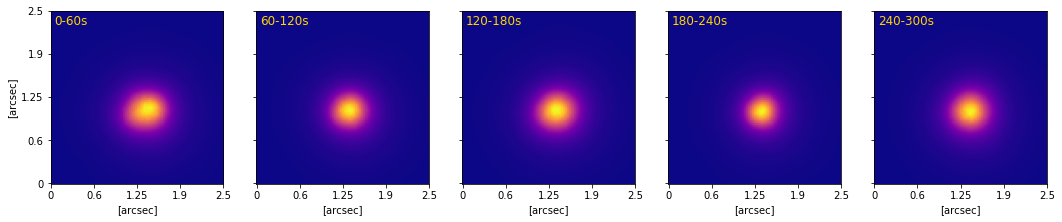

In [23]:
expTime=[0,1000]
labels=[0, .6, 1.25, 1.9, 2.5]
plt.figure(figsize=(15,3))
ax=plt.subplot(151)
plt.imshow(alldata[0:1000].mean(axis=0), origin='lower', cmap='plasma')
plt.xticks([0, 64, 128, 192, 256], labels)
plt.yticks([0, 64, 128, 192, 256], labels)
plt.ylabel('[arcsec]')
plt.xlabel('[arcsec]')
ax.text(5, 235, '0-60s', color='gold', fontsize=12)

ax=plt.subplot(152)
plt.imshow(alldata[1000:2000].mean(axis=0), origin='lower', cmap='plasma')
plt.xticks([0, 64, 128, 192, 256], labels)
plt.yticks([0, 64, 128, 192, 256], [])
ax.text(5, 235, '60-120s', color='gold', fontsize=12)
plt.xlabel('[arcsec]')

ax=plt.subplot(153)
plt.imshow(alldata[2000:3000].mean(axis=0), origin='lower', cmap='plasma')
plt.xticks([0, 64, 128, 192, 256], labels)
plt.yticks([0, 64, 128, 192, 256], [])
ax.text(5, 235, '120-180s', color='gold', fontsize=12)
plt.xlabel('[arcsec]')

ax=plt.subplot(154)
plt.imshow(alldata[3000:4000].mean(axis=0), origin='lower', cmap='plasma')
plt.xticks([0, 64, 128, 192, 256], labels)
plt.yticks([0, 64, 128, 192, 256], [])
ax.text(5, 235, '180-240s', color='gold', fontsize=12)
plt.xlabel('[arcsec]')

ax=plt.subplot(155)
plt.imshow(alldata[4000:5000].mean(axis=0), origin='lower', cmap='plasma')
plt.xticks([0, 64, 128, 192, 256], labels)
plt.yticks([0, 64, 128, 192, 256], [])
ax.text(5, 235, '240-300s', color='gold', fontsize=12)
plt.xlabel('[arcsec]')

plt.tight_layout();
# plt.savefig(f'../Plots/Zorro/{number}.png', bbox_to_inches='tight', dpi=250)

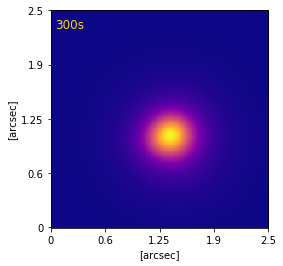

In [25]:
labels=[0, .6, 1.25, 1.9, 2.5]
plt.figure(figsize=(4,4))
ax=plt.subplot(111)
plt.imshow(alldata.mean(axis=0), origin='lower', cmap='plasma')
plt.xticks([0, 64, 128, 192, 256], labels)
plt.yticks([0, 64, 128, 192, 256], labels)
plt.ylabel('[arcsec]')
plt.xlabel('[arcsec]')
ax.text(5, 235, '300s', color='gold', fontsize=12);

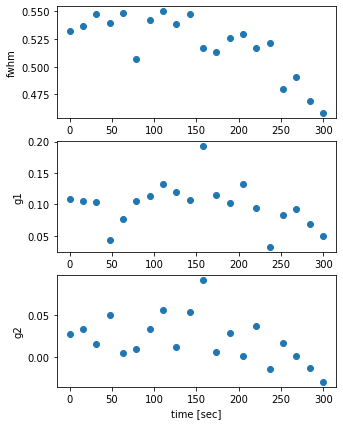

In [54]:
n = 20
e1, e2, sizes = [], [], []
for i in range(n):
    step = int(300/n)
    res = imghelp.singleExposureHSM(alldata[i*step:(i+1)*step].mean(axis=0))
    sizes.append(res.moments_sigma*2.355)
    e1.append(res.observed_shape.g1)
    e2.append(res.observed_shape.g2)
    
pts = np.linspace(0,300,n)

plt.figure(figsize=(5,7))
plt.subplot(311)
plt.plot(pts, np.array(sizes)*.00992, 'o')
plt.ylabel('fwhm')
plt.subplot(312)
plt.plot(pts, e1, 'o')
plt.ylabel('g1')
plt.subplot(313)
plt.plot(pts, e2, 'o')
plt.ylabel('g2')
plt.xlabel('time [sec]')
plt.show()